In [1]:
import uproot
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
def add_mass(df) :
    stop_points = [145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295]
    chi0_points = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    df['stop_mass'] = np.random.choice(stop_points, len(df))
    df['chi0_mass'] = np.random.choice(chi0_points, len(df))
    return df

In [39]:
fileptr = open('filelist', 'r')
lines   = fileptr.readlines()
df      = []

for i, line in zip(range(75), lines) :
    line  = line.strip('\n')
    df.append(pd.read_pickle('Pkl_files/' + str(line)))

In [40]:
sig_df = pd.concat(df)
tt_df  = pd.read_pickle('DESY_ttbar.pkl')

In [41]:
add_mass(tt_df)

,l_pt,l_eta,l_phi,lbar_pt,lbar_eta,lbar_phi,llbar_dphi,llbar_deta,MET,MT2,event_w,stop_mass,chi0_mass
0,68.813210,0.783428,2.222546,27.302094,0.082621,-0.567994,2.790541,0.700806,14.512433,0.000000,1.058602,265,1
1,53.816910,-0.504254,2.551759,33.045055,0.294797,-2.934131,0.797296,0.799050,43.682690,50.876019,1.229914,265,70
2,32.939449,-0.926941,-0.003557,59.064556,1.881812,-1.639201,1.635645,2.808753,91.645790,22.457380,0.926662,155,90
3,38.570145,0.044036,-0.254580,71.512238,-0.361570,-1.887602,1.633022,0.405607,12.062650,28.308147,0.146718,285,70
4,43.054966,0.135901,-0.793442,61.946774,-0.311101,-0.248813,0.544630,0.447003,50.947243,62.756882,1.279547,265,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701589,66.935829,2.153407,-1.503892,86.495033,1.034294,-2.998834,1.494943,1.119113,48.078011,51.982887,1.023807,165,100
701590,63.952545,-0.625261,3.096637,40.639206,-1.788905,-0.643407,2.543142,1.163644,80.425903,41.749691,1.029894,145,90
701591,218.240356,-1.833916,-0.114161,41.113899,-0.247579,-2.690945,2.576784,1.586337,138.901169,68.829445,0.949578,285,100
701592,25.682802,-1.336810,-1.585265,34.545418,1.292909,1.724235,2.973686,2.629719,71.261551,0.000000,1.027499,265,20


In [42]:
selected_columns = ['l_pt','l_phi','l_eta', 'lbar_pt', 'lbar_phi', 'lbar_eta', 'llbar_dphi', 'llbar_deta','MET','MT2', 'stop_mass', 'chi0_mass']

sig_df = sig_df[selected_columns]
tt_df  = tt_df[selected_columns]

In [43]:
# Standardize
# sig_mean = sig_df.mean()
# sig_std  = sig_df.std()

# tt_mean = tt_df.mean()
# tt_std  = tt_df.std()

# sig_df    = (sig_df - sig_mean)/ sig_std
# tt_df     = (tt_df  - tt_mean)/ tt_std

In [44]:
# signal    = sig_df.values
# bkg       = tt_df.values

# sig_label = np.ones(len(signal))
# bkg_label = np.zeros(len(bkg))

# data      = np.concatenate((signal,bkg))
# label     = np.concatenate((sig_label,bkg_label))

In [45]:
sig_df = sig_df.sample(frac=1)
tt_df  = tt_df.sample(frac=1)

In [46]:
# Select about half of whichever dataframe is smaller

sig_df_train = sig_df[:300000]
tt_df_train  = tt_df[:300000]

sig_df_val   = sig_df[300000:450000]
tt_df_val    = tt_df[300000:450000]

sig_df_test  = sig_df[450000:]
tt_df_test   = tt_df[450000:]

sig_df_train = (sig_df_train - sig_df_train.mean())/ sig_df_train.std()
tt_df_train  = (tt_df_train  - tt_df_train.mean())/ tt_df_train.std()

sig_df_val  = (sig_df_val - sig_df_val.mean())/ sig_df_val.std()
tt_df_val   = (tt_df_val  - tt_df_val.mean())/ tt_df_val.std()

sig_df_test  = (sig_df_test - sig_df_test.mean())/ sig_df_test.std()
tt_df_test   = (tt_df_test  - tt_df_test.mean())/ tt_df_test.std()

In [47]:
train_signal    = sig_df_train.values
train_bkg       = tt_df_train.values

train_sig_label = np.ones(len(train_signal))
train_bkg_label = np.zeros(len(train_bkg))

train_data      = np.concatenate((train_signal,train_bkg))
train_label     = np.concatenate((train_sig_label,train_bkg_label))

In [48]:
val_signal     = sig_df_val.values
val_bkg        = tt_df_val.values

val_sig_label  = np.ones(len(val_signal))
val_bkg_label  = np.zeros(len(val_bkg))

val_data       = np.concatenate((val_signal,val_bkg))
val_label      = np.concatenate((val_sig_label,val_bkg_label))

In [49]:
test_signal    = sig_df_test.values
test_bkg       = tt_df_test.values

test_sig_label = np.ones(len(test_signal))
test_bkg_label = np.zeros(len(test_bkg))

test_data      = np.concatenate((test_signal,test_bkg))
test_label     = np.concatenate((test_sig_label,test_bkg_label))

In [50]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=2, shuffle=True)
# skf.get_n_splits(data, label)
# skf.split(data, label)

# for train_index, test_index in skf.split(data, label):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = data[train_index], data[test_index]
#     y_train, y_test = label[train_index], label[test_index]

In [51]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
model.add(Dense(100, input_dim = 12 ,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, input_dim = 100 ,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1300      
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [15]:
hist = model.fit(train_data, train_label, batch_size=128, epochs=50,verbose=1, shuffle=True, validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-09-16 02:25:37.357083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-16 02:25:37.357542: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


3710/3750 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.7417WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2c347d940> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3750/3750 [==============================] - 3s 667us/step - loss: 0.5336 - accuracy: 0.7420 - val_loss: 0.7856 - val_accuracy: 0.4743

In [52]:
hist = model.fit(train_data, train_label, batch_size=64, epochs=50,verbose=1, shuffle=True, validation_data=(val_data, val_label),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
9339/9375 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7001 ETA: 0sWARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2a4531c10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

In [20]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Loss' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    plt.title('Cross Entropy Loss by Epoch', fontsize=17)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)

    plt.legend(fontsize=17)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Accuracy' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=17)
    plt.show()

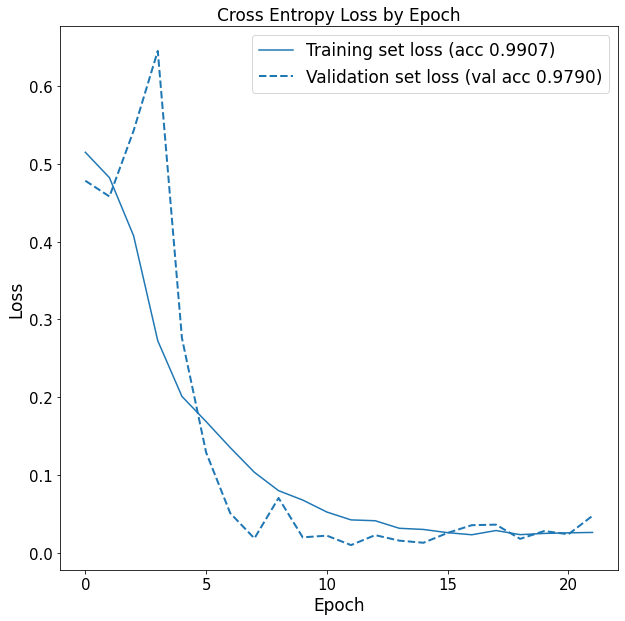

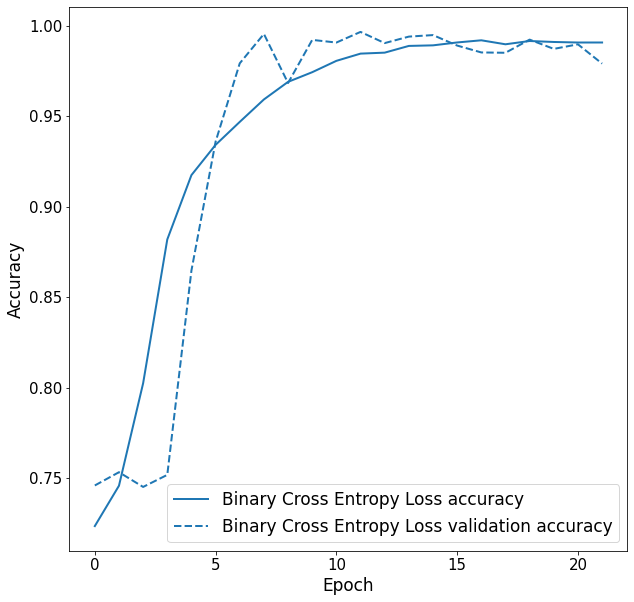

In [53]:
show_losses( [("Binary Cross Entropy Loss", hist)])

In [54]:
tt_pred  = model.predict(tt_df_test) 
si_pred  = model.predict(sig_df_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


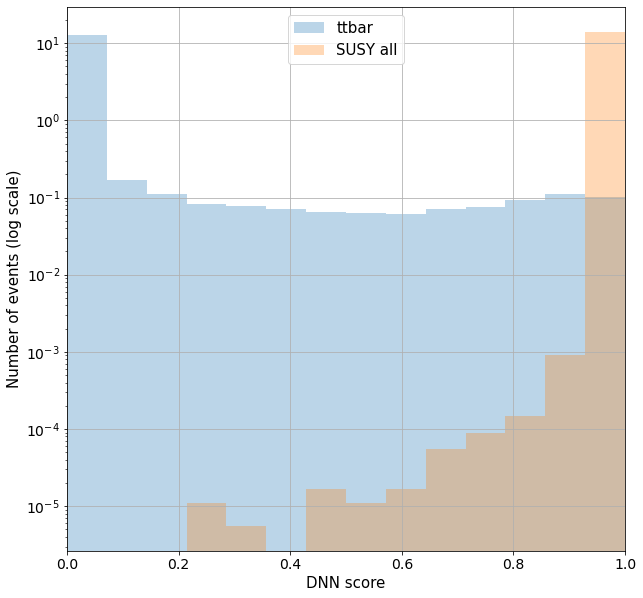

In [55]:
binning = np.linspace(0, 1, 15)
plt.figure(figsize=(10,10))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(tt_pred, bins=binning, alpha=0.3, label='ttbar', density=True)
plt.hist(si_pred, bins=binning, alpha=0.3, label='SUSY all', density=True)
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('DNN score', fontsize=15)
plt.ylabel('Number of events (log scale)', fontsize=15)
plt.grid()
plt.legend(loc='best', fontsize=15)
#plt.savefig('DNN score Mstop_235 Mchi_60.jpg')

In [26]:
import eli5
from   eli5.sklearn import PermutationImportance

from keras.metrics import BinaryAccuracy
from eli5.permutation_importance import get_score_importances

def score(X, y):
    y_pred = model.predict(X).ravel()
    y_true = y.ravel()
    metric = BinaryAccuracy()
    metric.update_state(y_pred, y_true)
    return metric.result().numpy()

In [27]:
shuffler   = np.random.permutation(len(test_label))
test_data = test_data[shuffler]
test_label = test_label[shuffler]

In [28]:
base_score, score_decreases = get_score_importances(score, test_data[:50000], test_label[:50000])
feature_importances         = np.mean(score_decreases, axis = 0)

In [29]:
features = sig_df.columns
for i in range(len(feature_importances)) :
    print('Feature :: ' + str(features[i]) + ' importance :: ' + str(abs(feature_importances[i])))

Feature :: l_pt importance :: 4.7999994e-05
Feature :: l_phi importance :: 4.0000024e-05
Feature :: l_eta importance :: 0.014128
Feature :: lbar_pt importance :: 1.5999982e-05
Feature :: lbar_phi importance :: 3.5999994e-05
Feature :: lbar_eta importance :: 0.013556001
Feature :: llbar_dphi importance :: 4.656613e-11
Feature :: llbar_deta importance :: 0.0115
Feature :: MET importance :: 3.5999947e-05
Feature :: MT2 importance :: 3.2000058e-05
Feature :: stop_mass importance :: 0.00014000005
Feature :: chi0_mass importance :: 0.00065600005
